<a href="https://colab.research.google.com/github/aneeshmurali-n/ABC-Company-Data-Analysis-Report/blob/main/ABC_Company_Data_Analysis_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Upload Dataset

In [1]:
from google.colab import files
uploaded = files.upload()

Saving myexcel.xlsx to myexcel.xlsx


### Import modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###Load dataset "Dataset_excl.xlsx" file

In [3]:
df = pd.read_excel('myexcel.xlsx')   # load file into df
df                                   # show df


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,2023-03-06 00:00:00,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,2023-01-06 00:00:00,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,2023-03-07 00:00:00,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


Preprocessing:
Correct the data in the "height" column by replacing it with random numbers between 150 and 180. Ensure data consistency and integrity before proceeding with analysis.

In [4]:
number_of_rows = len(df)                                      # get number of rows in df
df['Height'] = np.random.randint(150,180,size=number_of_rows) # generate and fill random numbers between 150 and 180 in the 'Height' column
df                                                            # show df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,168,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,161,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,166,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,168,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,173,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,152,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,175,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,174,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,158,231,Kansas,947276.0


In [5]:
df.info()                               # show df info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    int64  
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(4), object(4)
memory usage: 32.3+ KB


In [6]:
df['College'].fillna('Unknown', inplace=True) # handle nan value in college ( replaced with 'Unknown')

In [7]:
df[df['Salary'].isna()] # employees with missing salary

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
2,John Holland,Boston Celtics,30,SG,27,166,205,Boston University,NaN
46,Elton Brand,Philadelphia 76ers,42,PF,37,168,254,Duke,NaN
171,Dahntay Jones,Cleveland Cavaliers,30,SG,35,150,225,Duke,NaN
264,Jordan Farmar,Memphis Grizzlies,4,PG,29,179,180,UCLA,NaN
269,Ray McCallum,Memphis Grizzlies,5,PG,24,163,190,Detroit,NaN
270,Xavier Munford,Memphis Grizzlies,14,PG,24,174,180,Rhode Island,NaN
273,Alex Stepheson,Memphis Grizzlies,35,PF,28,154,270,USC,NaN
350,Briante Weber,Miami Heat,12,PG,23,150,165,Virginia Commonwealth,NaN
353,Dorell Wright,Miami Heat,11,SF,30,157,205,Unknown,NaN
397,Axel Toupane,Denver Nuggets,6,SG,23,163,210,Unknown,NaN


In [8]:
print (f"The Number of missing values in salary column : {df['Salary'].isnull().sum()}")           # show nan value count in Salary column of df

The Number of missing values in salary column : 11


In [9]:
11/458 *100 # percentage of missing values

2.4017467248908297

This is an analysis-focused project for storytelling and we have only 11 missing rows out of 458, dropping rows with missing salaries is a good approach. This avoids the complexity of imputing while only sacrificing 2.4% of the data. If we impute values that may introduce some uncertainty because they are estimates not actual data so we desided to drop it

In [10]:
df.dropna(subset=['Salary'], inplace=True) # drop rows with missing salary
df.info()                                  # show df info after drop and clean up

<class 'pandas.core.frame.DataFrame'>
Index: 447 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      447 non-null    object 
 1   Team      447 non-null    object 
 2   Number    447 non-null    int64  
 3   Position  447 non-null    object 
 4   Age       447 non-null    int64  
 5   Height    447 non-null    int64  
 6   Weight    447 non-null    int64  
 7   College   447 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(4), object(4)
memory usage: 34.9+ KB


In [11]:
df.describe()                           # show df describe (summary of the numerical statistics of a Data)

,Number,Age,Height,Weight,Salary
count,447.000000,447.000000,447.000000,447.000000,4.470000e+02
mean,17.718121,26.914989,164.809843,221.774049,4.833970e+06
std,16.026218,4.394955,8.475610,26.132217,5.226620e+06
min,0.000000,19.000000,150.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,157.000000,200.000000,1.025210e+06
50%,13.000000,26.000000,165.000000,220.000000,2.836186e+06
75%,25.000000,30.000000,172.000000,240.000000,6.500000e+06
max,99.000000,40.000000,179.000000,307.000000,2.500000e+07


##1.   Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees.


In [12]:
total_number_of_employees = len(df)                   # number of rows = total number of employees.
distribution_of_employees = df['Team'].value_counts() # Return a Series containing the frequency of each distinct row in the Dataframe = distribution_of_employees
percentage_split = (distribution_of_employees / total_number_of_employees) * 100  # calculate the percentage split relative to the total number of employees.
employee_analysis = pd.DataFrame({'players distribution': distribution_of_employees , 'Percentage split': percentage_split})
print(employee_analysis)


                        players distribution  Percentage split
Team                                                          
New Orleans Pelicans                      19          4.250559
Utah Jazz                                 16          3.579418
New York Knicks                           16          3.579418
Milwaukee Bucks                           16          3.579418
Indiana Pacers                            15          3.355705
Portland Trail Blazers                    15          3.355705
Oklahoma City Thunder                     15          3.355705
Washington Wizards                        15          3.355705
Charlotte Hornets                         15          3.355705
Atlanta Hawks                             15          3.355705
San Antonio Spurs                         15          3.355705
Houston Rockets                           15          3.355705
Brooklyn Nets                             15          3.355705
Dallas Mavericks                          15          3

Graphical Representation of the distribution of employees across each team and the percentage split relative to the total number of employees.

In [13]:
color_palette = sns.color_palette('husl', len(employee_analysis)) # generate a color palettes

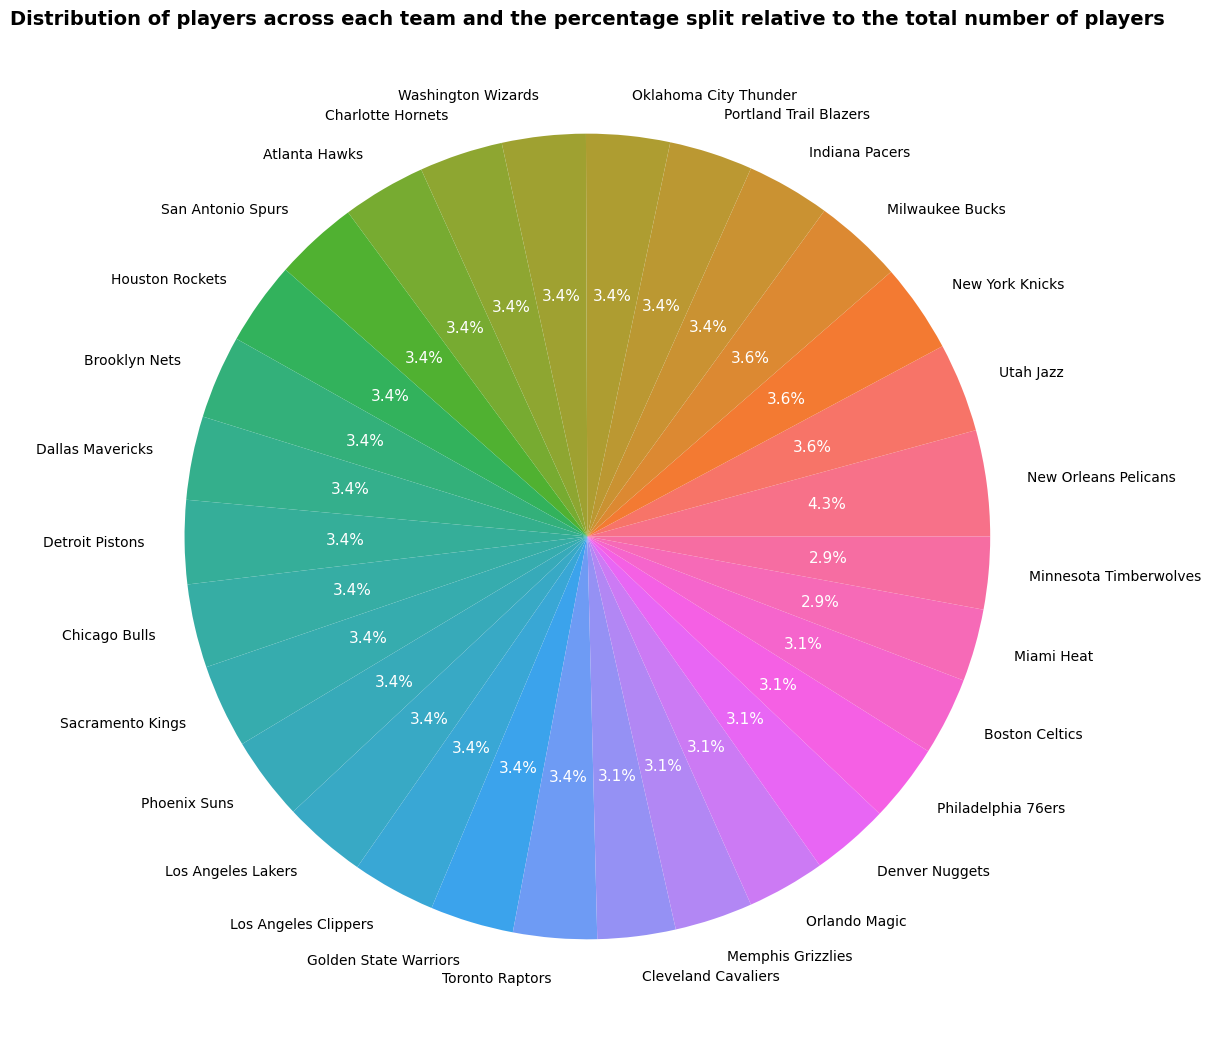

In [14]:
labels = employee_analysis.index.tolist() # convert employee_analysis.index 'Team' names to list and save to labels
plt.figure(figsize=(12,12))    # Adjust figure size (width, height)
autotexts = plt.pie(distribution_of_employees, labels=labels, autopct='%1.1f%%', startangle=0, colors=color_palette)[2] # Plot pie chart
for autotext in autotexts:      # Set the percentage text color to white
    autotext.set_color('white')
    autotext.set_fontsize(11)   # Set the percentage text size
plt.title('Distribution of players across each team and the percentage split relative to the total number of players',fontsize=14,fontweight='bold') # Add title
plt.tight_layout() # Adjust layout
plt.show() # Show the pie chart

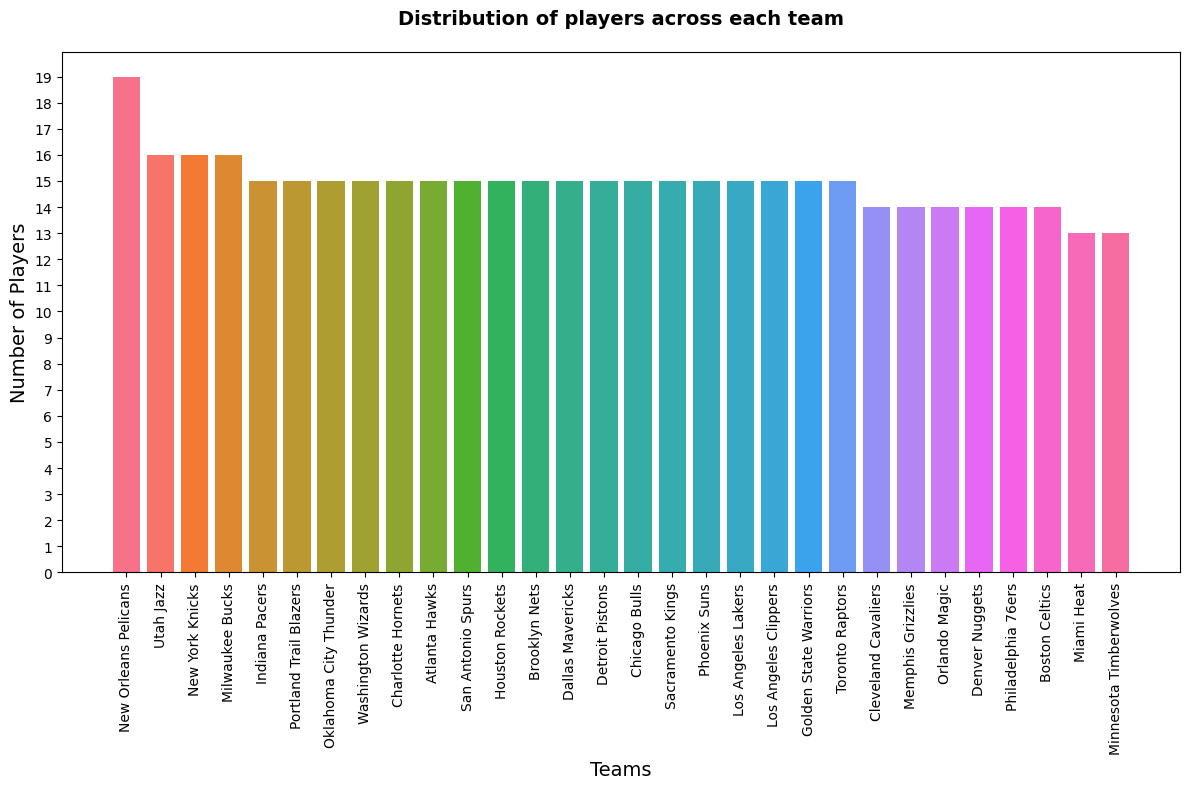

In [15]:
plt.figure(figsize=(12, 8))
plt.bar(labels, distribution_of_employees, color=color_palette)
plt.xticks(rotation=90)
plt.yticks(ticks=range(0, max(distribution_of_employees) + 1))
plt.title('Distribution of players across each team', fontsize=14,fontweight='bold', loc='center', pad=20)
plt.xlabel('Teams', fontsize=14)
plt.ylabel('Number of Players', fontsize=14)
plt.tight_layout()
plt.show()


##2. Segregate employees based on their positions within the company.

In [16]:
segregate = df.groupby('Position').count()['Name']
segregate # show count of employees based on their positions within the company

,Name
Position,
C,79
PF,97
PG,88
SF,84
SG,99


In [17]:
# Segregate employees based on their positions within the company.
employee_in_C_pos = df[df['Position'].isin(['C'])] # filter employees based on their position (c)
employee_in_PF_pos = df[df['Position'].isin(['PF'])] # filter employees based on their position (PF)
employee_in_PG_pos = df[df['Position'].isin(['PG'])] # filter employees based on their position (PG)
employee_in_SF_pos = df[df['Position'].isin(['SF'])] # filter employees based on their position (SF)
employee_in_SG_pos = df[df['Position'].isin(['SG'])] # filter employees based on their position (SG)

In [18]:
employee_in_SF_pos # test filter

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
1,Jae Crowder,Boston Celtics,99,SF,25,161,235,Marquette,6796117.0
32,Thanasis Antetokounmpo,New York Knicks,43,SF,23,171,205,Unknown,30888.0
33,Carmelo Anthony,New York Knicks,7,SF,32,156,240,Syracuse,22875000.0
35,Cleanthony Early,New York Knicks,11,SF,25,158,210,Wichita State,845059.0
42,Lance Thomas,New York Knicks,42,SF,28,157,235,Duke,1636842.0
...,...,...,...,...,...,...,...,...,...
428,Al-Farouq Aminu,Portland Trail Blazers,8,SF,25,152,215,Wake Forest,8042895.0
432,Maurice Harkless,Portland Trail Blazers,4,SF,23,163,215,St. John's,2894059.0
448,Gordon Hayward,Utah Jazz,20,SF,26,152,226,Butler,15409570.0
450,Joe Ingles,Utah Jazz,2,SF,28,163,226,Unknown,2050000.0


In [19]:
df[df['Salary']==df['Salary'].max()]  # highest payed player

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
109,Kobe Bryant,Los Angeles Lakers,24,SF,37,173,212,Unknown,25000000.0


In [20]:
[employee_in_C_pos['Position'].iloc[0]] # test

['C']

In [21]:
# Print the Number of employees under each position
for employees in [employee_in_C_pos, employee_in_PF_pos, employee_in_PG_pos, employee_in_SF_pos, employee_in_SG_pos] :
    print(f"{len(employees)} players in {employees['Position'].iloc[0]} Position.")

79 players in C Position.
97 players in PF Position.
88 players in PG Position.
84 players in SF Position.
99 players in SG Position.


In [22]:
# Print the employee name under each position and salary
for employees in [employee_in_C_pos, employee_in_PF_pos, employee_in_PG_pos, employee_in_SF_pos, employee_in_SG_pos] :
    print(f"players in {employees['Position'].iloc[0]} Position \n {'-'*50}")
    for index, row in employees.iterrows():
        print(f"{row['Name']} , Salary : {row['Salary']}")
    print("\n")

players in C Position 
 --------------------------------------------------
Kelly Olynyk , Salary : 2165160.0
Jared Sullinger , Salary : 2569260.0
Tyler Zeller , Salary : 2616975.0
Brook Lopez , Salary : 19689000.0
Henry Sims , Salary : 947276.0
Robin Lopez , Salary : 12650000.0
Kevin Seraphin , Salary : 2814000.0
Joel Embiid , Salary : 4626960.0
Jahlil Okafor , Salary : 4582680.0
Bismack Biyombo , Salary : 2814000.0
Lucas Nogueira , Salary : 1842000.0
Jonas Valanciunas , Salary : 4660482.0
Andrew Bogut , Salary : 13800000.0
Festus Ezeli , Salary : 2008748.0
Marreese Speights , Salary : 3815000.0
Cole Aldrich , Salary : 1100602.0
DeAndre Jordan , Salary : 19689000.0
Tarik Black , Salary : 845059.0
Roy Hibbert , Salary : 15592217.0
Robert Sacre , Salary : 981348.0
Tyson Chandler , Salary : 13000000.0
Alex Len , Salary : 3807120.0
Alan Williams , Salary : 83397.0
Willie Cauley-Stein , Salary : 3398280.0
DeMarcus Cousins , Salary : 15851950.0
Kosta Koufos , Salary : 7700000.0
Pau Gasol , S

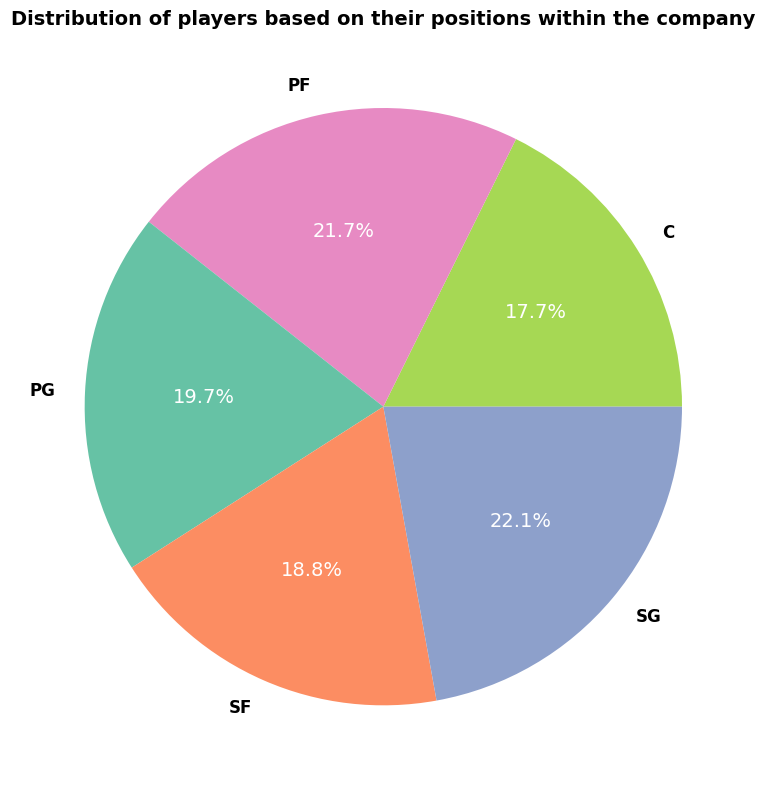

In [23]:
labels = segregate.index.tolist()
plt.figure(figsize=(8,8))    # Adjust figure size (width, height)
colors = {'PG':'#66c2a5', 'SF':'#fc8d62','SG':'#8da0cb','PF':'#e78ac3','C':'#a6d854'}
ordered_colors = [colors[label] for label in labels]
autotexts = plt.pie(segregate,labels=labels,autopct='%1.1f%%', startangle=0, colors=ordered_colors ,textprops={'fontsize': 12, 'fontweight': 'bold'})[2] # Plot pie chart
for autotext in autotexts:      # Set the percentage text color to white
    autotext.set_color('white')
    autotext.set_fontsize(14)   # Set the percentage text size
    autotext.set_fontweight('normal')
plt.title('Distribution of players based on their positions within the company',fontsize=14,fontweight='bold') # Add title
plt.tight_layout() # Adjust layout
plt.show() # Show the pie chart

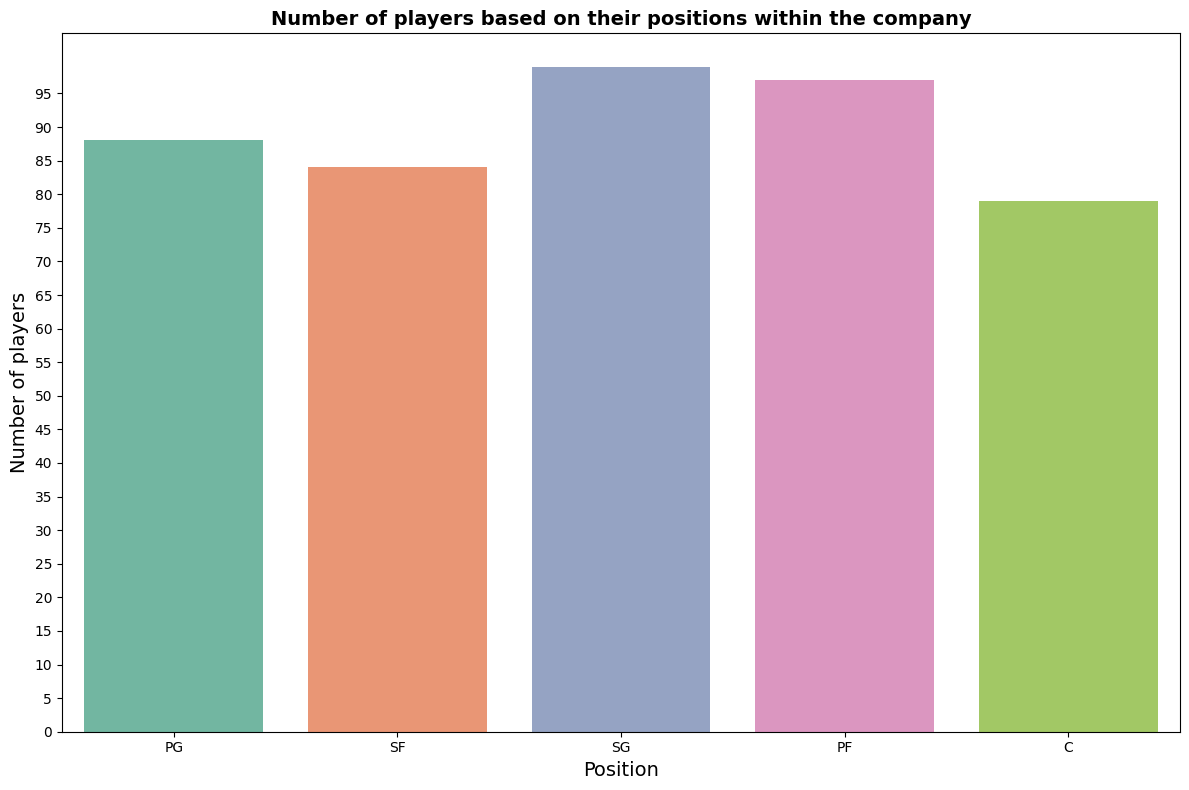

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Position', hue='Position', palette='Set2')
plt.yticks(ticks=range(0, max(segregate) + 1, 5))
plt.title('Number of players based on their positions within the company', fontsize=14,fontweight='bold')
plt.ylabel('Number of players', fontsize=14)
plt.xlabel('Position', fontsize=14)
plt.tight_layout()
plt.show()

##3. Identify the predominant age group among employees.

In [25]:
df.head() # show df head

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,168,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,161,235,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28,SG,22,168,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,173,231,Unknown,5000000.0
5,Amir Johnson,Boston Celtics,90,PF,29,152,240,Unknown,12000000.0


In [26]:
age_count=df['Age'].value_counts() # show the Age and count
age_count

,count
Age,
25,45
24,45
27,40
23,39
26,36
28,30
30,30
29,27
22,26


In [27]:
# Print the predominant age group among employees
print(f"The predominant age group among players is {age_count[age_count == age_count.max()].index.tolist()}")

The predominant age group among players is [25, 24]


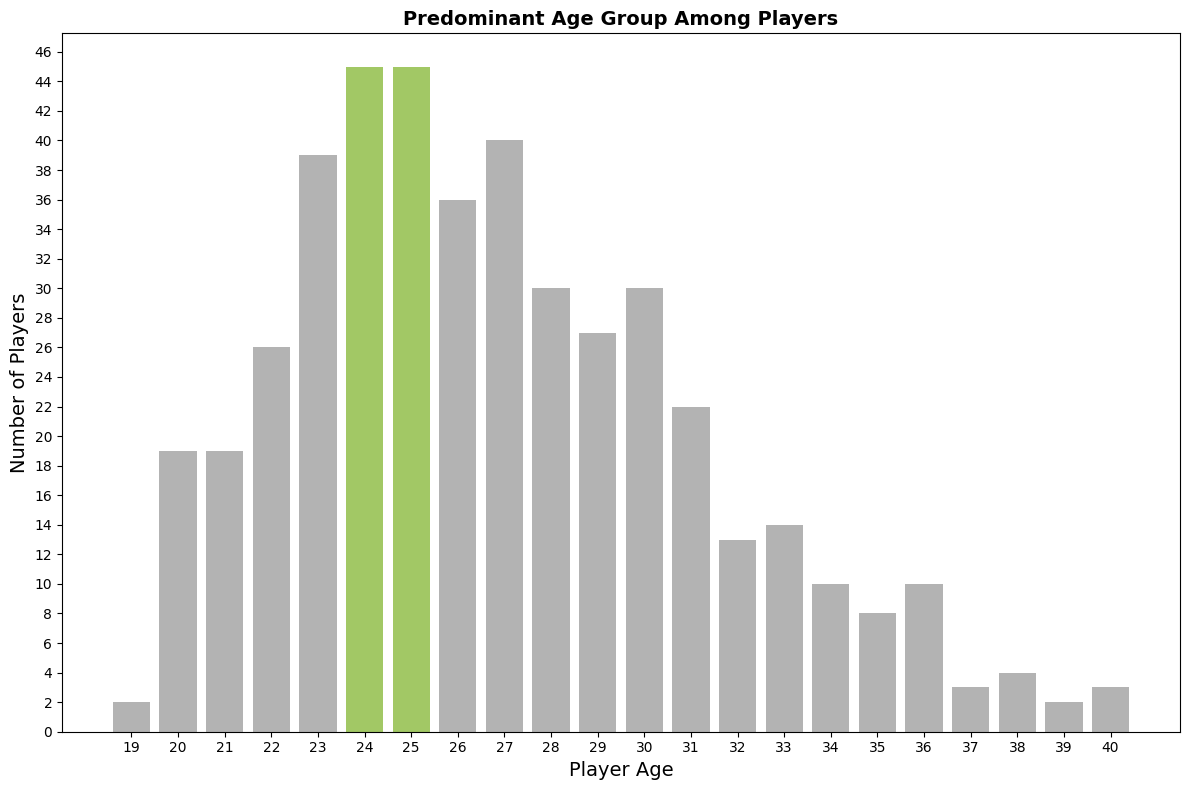

In [28]:
# Get the max y value
ymax = age_count.max()

# Create color list
colors = ['#b3b3b3' if y != ymax else '#a2c865' for y in age_count.values]

# Draw bar plot
plt.figure(figsize=(12, 8))
plt.bar(age_count.index, age_count.values,color=colors)  ## age , age count
plt.title('Predominant Age Group Among Players', fontsize=14, fontweight='bold')
plt.xlabel('Player Age', fontsize=14)
plt.ylabel('Number of Players', fontsize=14)
plt.xticks(age_count.index)
plt.yticks(ticks=range(0, max(age_count.values) + 2, 2))
plt.tight_layout()
plt.show()

##4. Discover which team and position have the highest salary expenditure.

In [29]:
# Group by 'Team' and 'Position and sum salary for each position within the group
grouped_df = df.groupby(['Team', 'Position'], as_index=False)['Salary'].sum()
grouped_df

,Team,Position,Salary
0,Atlanta Hawks,C,22756250.0
1,Atlanta Hawks,PF,23952268.0
2,Atlanta Hawks,PG,9763400.0
3,Atlanta Hawks,SF,6000000.0
4,Atlanta Hawks,SG,10431032.0
...,...,...,...
144,Washington Wizards,C,24490429.0
145,Washington Wizards,PF,11300000.0
146,Washington Wizards,PG,18022415.0
147,Washington Wizards,SF,11158800.0


In [30]:
# Find the salary expenditure of every team
highest_salary_expenditure_team_df = grouped_df.groupby(['Team'], as_index=False)['Salary'].sum() # group by team and sum salary of each team
highest_salary_expenditure_team_df.head() # show first five

,Team,Salary
0,Atlanta Hawks,72902950.0
1,Boston Celtics,58541068.0
2,Brooklyn Nets,52528475.0
3,Charlotte Hornets,78340920.0
4,Chicago Bulls,86783378.0


In [31]:
# Find the team having the highest salary expenditure.
high_salary_team_data = highest_salary_expenditure_team_df.loc[highest_salary_expenditure_team_df['Salary'].idxmax()]
print(f"The team having the highest salary expenditure is {high_salary_team_data.iloc[0]}")
print(f"and the salary expenditure is ${high_salary_team_data.iloc[1]}")

The team having the highest salary expenditure is Cleveland Cavaliers
and the salary expenditure is $106988689.0


In [32]:
grouped_df[grouped_df['Team'] == 'Cleveland Cavaliers']

,Team,Position,Salary
24,Cleveland Cavaliers,C,20486870.0
25,Cleveland Cavaliers,PF,27882029.0
26,Cleveland Cavaliers,PG,19654777.0
27,Cleveland Cavaliers,SF,23917776.0
28,Cleveland Cavaliers,SG,15047237.0


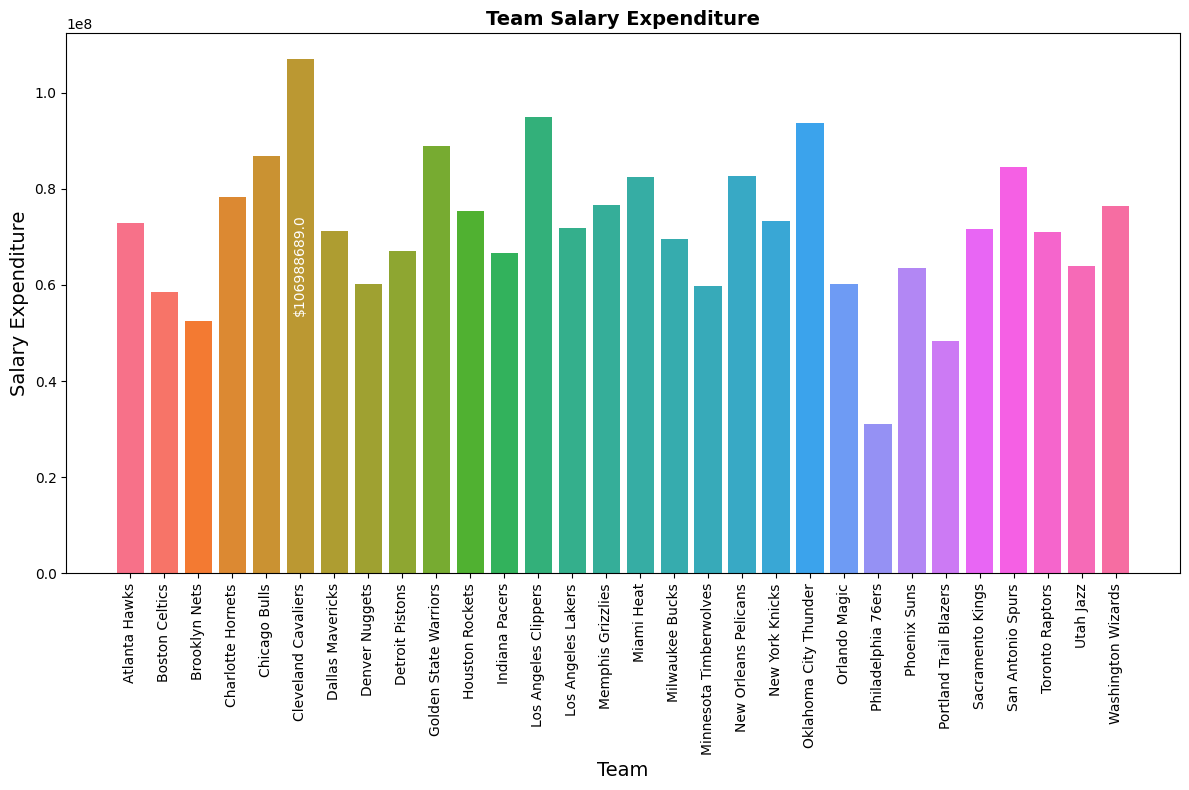

In [33]:
# Graphical representation of the team having the highest salary expenditure
plt.figure(figsize=(12, 8))
plt.bar(highest_salary_expenditure_team_df.Team, highest_salary_expenditure_team_df.Salary, color=color_palette)
plt.title('Team Salary Expenditure', fontsize=14, fontweight='bold')
plt.xlabel('Team', fontsize=14)
plt.ylabel('Salary Expenditure', fontsize=14)
plt.xticks(rotation=90)
highest_salary = highest_salary_expenditure_team_df.Salary.max()
highest_salary_index = highest_salary_expenditure_team_df.Salary.idxmax()
plt.text(highest_salary_index, highest_salary/2, '$'+str(highest_salary), color='white', ha='center', va='bottom',rotation=90)
plt.tight_layout()
plt.show()

In [34]:
# Find position having the highest salary expenditure within the teams.
highest_salary_expenditure = grouped_df.loc[grouped_df['Salary'].idxmax()]
print(f"The position having the highest salary expenditure within the teams is {highest_salary_expenditure.iloc[1]} of the team {highest_salary_expenditure.iloc[0]}")
print(f"and the salary expenditure is ${highest_salary_expenditure.iloc[2]}")

The position having the highest salary expenditure within the teams is SF of the team Los Angeles Lakers
and the salary expenditure is $31866445.0


In [35]:
grouped_df[grouped_df['Team']=='Los Angeles Lakers']

,Team,Position,Salary
64,Los Angeles Lakers,C,17418624.0
65,Los Angeles Lakers,PF,9012090.0
66,Los Angeles Lakers,PG,6473272.0
67,Los Angeles Lakers,SF,31866445.0
68,Los Angeles Lakers,SG,7000000.0


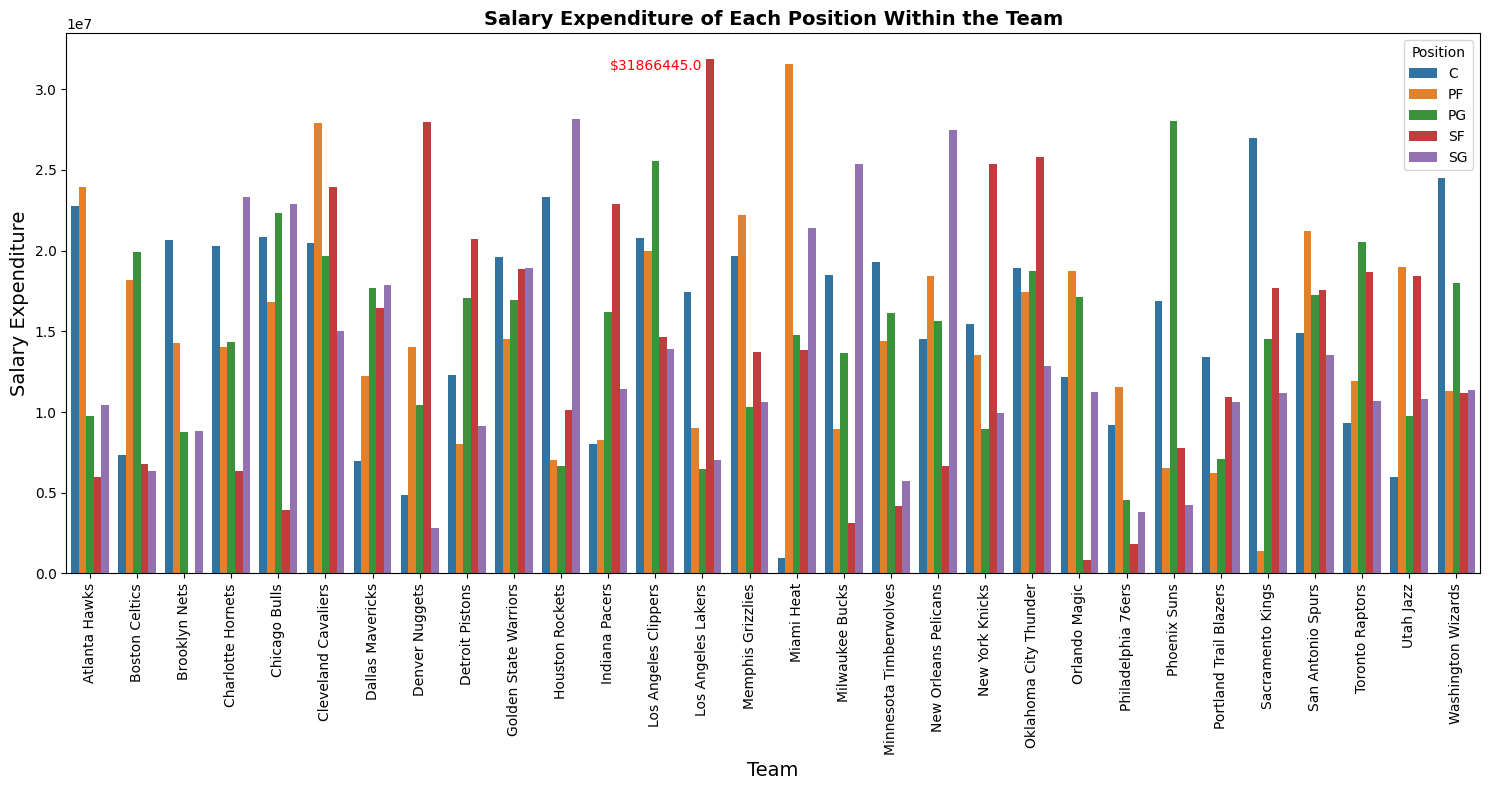

In [36]:
# Graphical representation position having the highest salary expenditure within the teams.
plt.figure(figsize=(15, 8))
sns.barplot(data=grouped_df, x='Team', y='Salary', hue='Position') # , palette=["#1a53ff", "#0d88e6", "#00b7c7", "#5ad45a", "#8be04e"]
plt.title('Salary Expenditure of Each Position Within the Team', fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Salary Expenditure', fontsize=14)
plt.text(highest_salary_expenditure.iloc[0], highest_salary_expenditure.iloc[2], '$'+str(highest_salary_expenditure.iloc[2]), color='red', ha='right', va='top')
plt.tight_layout()
plt.show()

In [37]:
# Find position having the highest overall salary expenditure
pos_salary_df = grouped_df.groupby(['Position'], as_index=False)['Salary'].sum()
highest_pos_salary_expenditure_overall = pos_salary_df.loc[pos_salary_df['Salary'].idxmax()]
print(f"The position having the highest overall salary expenditure is {highest_pos_salary_expenditure_overall.iloc[0]}")
print(f"and the salary expenditure is ${highest_pos_salary_expenditure_overall.iloc[1]}")

The position having the highest overall salary expenditure is C
and the salary expenditure is $466377332.0


In [38]:
pos_salary_df

,Position,Salary
0,C,466377332.0
1,PF,442560850.0
2,PG,446848971.0
3,SF,408020976.0
4,SG,396976258.0


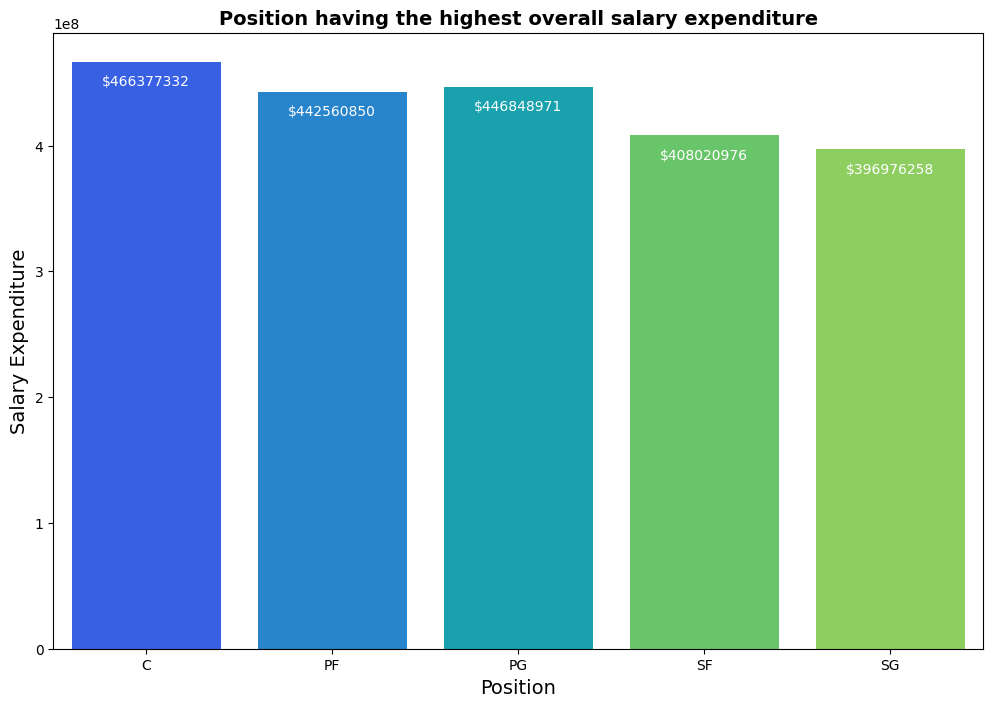

In [39]:
# Graphical representation of position having the highest salary expenditure overall.
plt.figure(figsize=(12, 8))
sns.barplot(data=pos_salary_df, x='Position',y='Salary', hue='Position', palette=["#1a53ff", "#0d88e6", "#00b7c7", "#5ad45a", "#8be04e"])
plt.title('Position having the highest overall salary expenditure', fontsize=14, fontweight='bold')
plt.xlabel('Position', fontsize=14)
plt.ylabel('Salary Expenditure', fontsize=14)
for index, row in pos_salary_df.iterrows():
  plt.text(row['Position'], row['Salary']-10000000, '$'+str(int(row['Salary'])), color='white', ha='center', va='top')
plt.show()

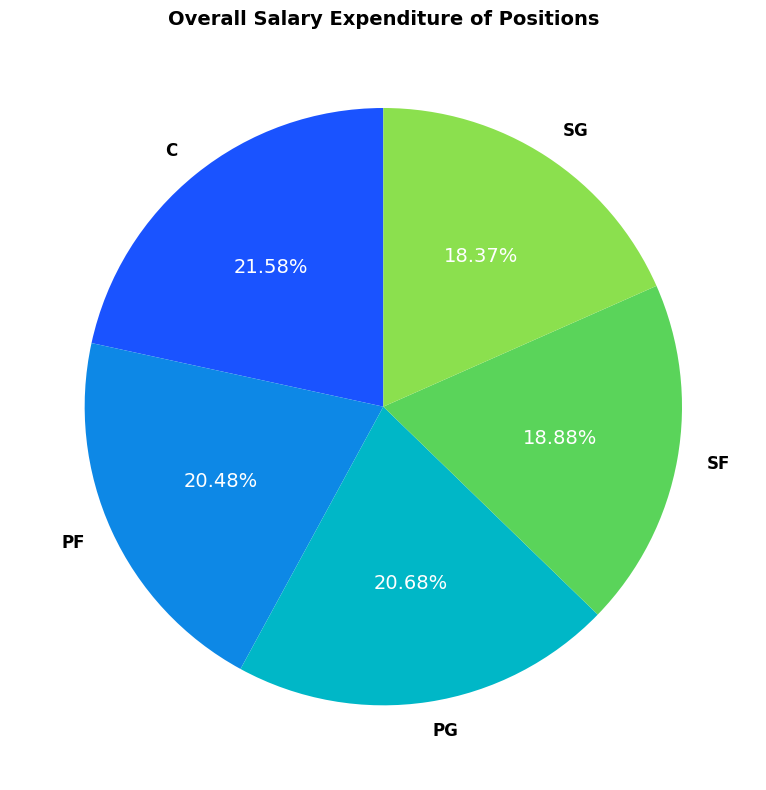

In [40]:
plt.figure(figsize=(12, 8))
autotexts = plt.pie(pos_salary_df['Salary'], labels=pos_salary_df['Position'], autopct='%1.2f%%', startangle=90, colors=["#1a53ff", "#0d88e6", "#00b7c7", "#5ad45a", "#8be04e"],textprops={'fontsize': 12, 'fontweight': 'bold'})[2]
for autotext in autotexts:      # Set the percentage text color to white
    autotext.set_color('white')
    autotext.set_fontsize(14)   # Set the percentage text size
    autotext.set_fontweight('normal')
plt.title('Overall Salary Expenditure of Positions', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 5. Investigate if there's any correlation between age and salary, and represent it visually.

In [41]:
corr = df[['Age', 'Salary']].corr() # calculate correlation metrix
corr # show

,Age,Salary
Age,1.000000,0.214009
Salary,0.214009,1.000000


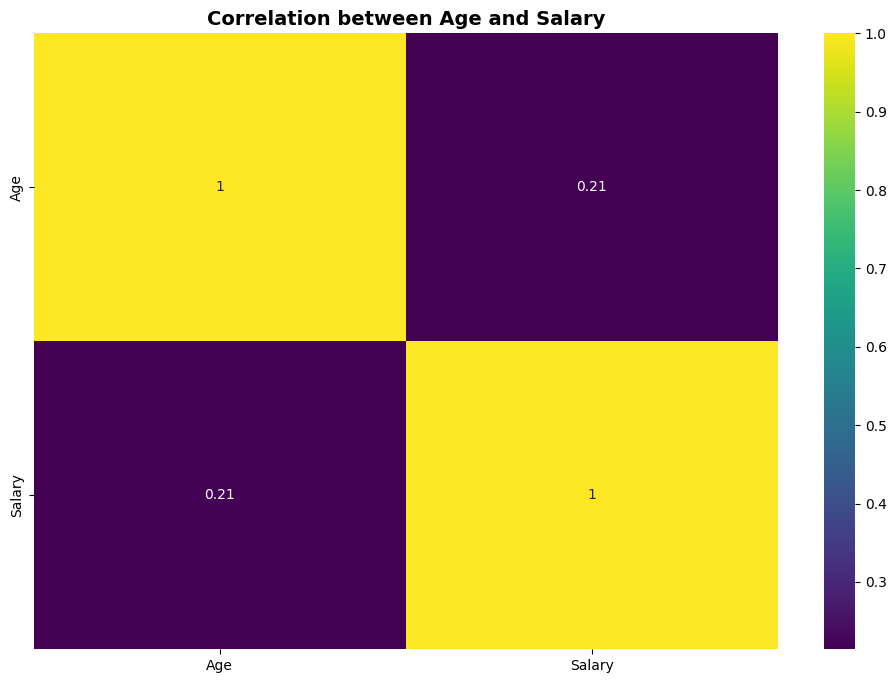

In [42]:
# Plot heatmap to represent it visually
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title('Correlation between Age and Salary', fontsize=14, fontweight='bold')
plt.show()

# Data Story Link


[ABC Company Comprehensive Data Analysis Report PDF](https://github.com/aneeshmurali-n/ABC-Company-Data-Analysis-Report/blob/4fc5b0bc7f89dc8101704fdcfb48a58706e2ac88/ABC%20Company%20Workforce%20Insights.pdf)